### Laney's first problem

- du/dt + du/dx = 0 
- u(x, 0) = -sin(pi * x)
- Periodic in [-1,1]

Find u(x, 40)

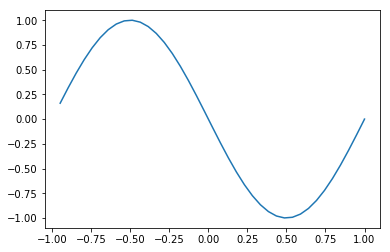

In [1]:
%matplotlib inline
from riemann import *
from matplotlib import pyplot as plt

## Setup variables ##

points = np.linspace(-1,1,40)
dx = points[1] - points[0]
arr1 = [-1-dx*i for i in range(1,4)]
arr1.reverse()
extended_points = np.array(arr1 + list(points) + [1+dx*i for i in range(1,4)])
points = extended_points

dx = points[1] - points[0]
hdx = 2
h = hdx * dx
dt = 0.01
tf = 0.1
times = np.linspace(0,tf,int(tf/dt))

rho=range(len(points))
for i in range(len(points)):
    rho[i] = np.sum(vec_kernel(points[i] - points, h, 0))
rho = np.array(rho, dtype='float32')

phi = np.arange(len(points), dtype='float32')
phi = 0.0*phi
phi[3:len(points)-3] = -np.sin(np.pi*points[3:len(points)-3])

x = points

particles = ParticleArray(name = 'batman', rho = rho, phi = phi, x = x, h = h)
particles.tag[3:len(points)-3] = 1

# Here tag = 1 means it is real and tag = 0 means it is a ghost particle

new_sim = RiemannSolver1D(particles = particles, phi_initial = phi, kernel = vec_kernel, EGN = 1)

new_sim.configure_solver(0.1, 40)
#plt.plot(new_sim.particles.x)
for i in range(int(new_sim.tf/new_sim.dt)):
    new_sim.update_rho()
    new_sim.update_field_euler()
    new_sim.update_position_euler()
#new_sim.compute_phi()
plt.plot(new_sim.particles.x[3:new_sim.nopart-3], new_sim.particles.phi[3:new_sim.nopart-3])
  

### Laney's Second problem

- du/dt + du/dx = 0 
- u(x, 0) = 1 if |x| < 1/3 O/w = 0
- Periodic in [-1,1]

Find u(x, 40)

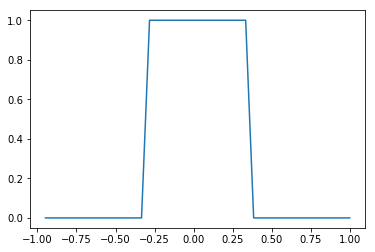

In [2]:
%matplotlib inline
from riemann import *
from matplotlib import pyplot as plt

## Setup variables ##

points = np.linspace(-1,1,40)
dx = points[1] - points[0]
arr1 = [-1-dx*i for i in range(1,4)]
arr1.reverse()
extended_points = np.array(arr1 + list(points) + [1+dx*i for i in range(1,4)])
points = extended_points

dx = points[1] - points[0]
hdx = 2
h = hdx * dx
dt = 0.01
tf = 0.1
times = np.linspace(0,tf,int(tf/dt))

rho=range(len(points))
for i in range(len(points)):
    rho[i] = np.sum(vec_kernel(points[i] - points, h, 0))
rho = np.array(rho, dtype='float32')

phi = np.arange(len(points), dtype='float32')
phi[:] = 0.0
phi[np.where(abs(points)<(1.0/3))] = 1.0

x = points

particles = ParticleArray(name = 'batman', rho = rho, phi = phi, x = x, h = h)
particles.tag[3:len(points)-3] = 1

# Here tag = 1 means it is real and tag = 0 means it is a ghost particle

new_sim = RiemannSolver1D(particles = particles, phi_initial = phi, kernel = vec_kernel, EGN = 1)

new_sim.configure_solver(0.1, 40)
#plt.plot(new_sim.particles.x)
for i in range(int(new_sim.tf/new_sim.dt)):
    new_sim.update_rho()
    new_sim.update_field_euler()
    new_sim.update_position_euler()
#new_sim.compute_phi()
plt.plot(new_sim.particles.x[3:new_sim.nopart-3], new_sim.particles.phi[3:new_sim.nopart-3])
  